In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import shapefile as shp
import seaborn as sns
import numpy as np
import geopandas as gpd

# Dataset

Data can be found on https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Manhattan Map

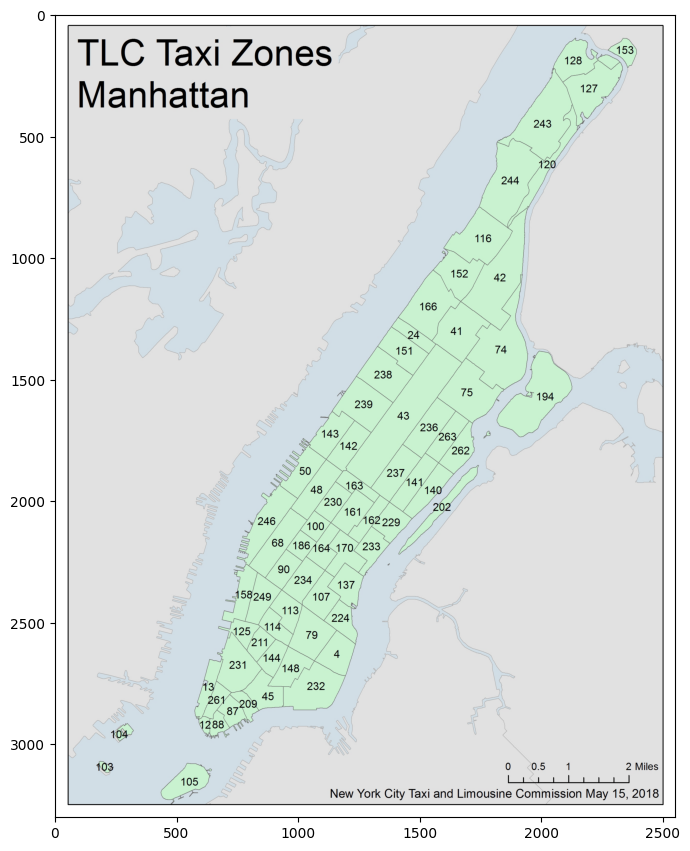

In [3]:
manhattan = plt.imread("./taxi_zone_map_manhattan.jpg")
plt.figure(figsize=(8,14))
plt.imshow(manhattan) 
plt.show()

In [5]:
df = pd.read_parquet("./yellow_tripdata_2022-01.parquet", engine= "auto")

## Utility Functions

In [6]:
def open_sample_from_file(path : str,column_to_search: str = None , search_value:str|float|int = None, show_columns = False) -> pd.DataFrame | pd.Series :
    """
    Helper function to read a file sample with optional search conditions
    """
    parquet = path.endswith('parquet')
    func = getattr(pd, f'read_csv')
    if parquet:
        engine = 'auto'
        func = getattr(pd, f'read_parquet')
        return func(path, engine)
    
    if column_to_search:
        if search_value != None:
            df = func(path)
            return df[df[column_to_search] == search_value]
        
        return func(path)[column_to_search] 

    if show_columns:
        return func(path).columns

    return func(path)


## Data Exploration

In [8]:
manhattan_df = open_sample_from_file("./taxi+_zone_lookup.csv",column_to_search='Borough',search_value='Manhattan')

In [9]:
manhattan_ids = manhattan_df[manhattan_df['service_zone']=='Yellow Zone'].LocationID.values

In [10]:
manhattan_ids

array([  4,  12,  13,  24,  43,  45,  48,  50,  68,  79,  87,  88,  90,
       100, 103, 104, 105, 107, 113, 114, 125, 137, 140, 141, 142, 143,
       144, 148, 151, 158, 161, 162, 163, 164, 170, 186, 194, 209, 211,
       224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 246, 249,
       261, 262, 263], dtype=int64)

In [11]:
filtered_df = df[df["PULocationID"].isin(manhattan_ids)]

In [15]:
geo_map = gpd.read_file("./shapefiles/taxi_zones.shp")

In [16]:
selection = geo_map.borough.isin(["Manhattan"])

In [17]:
lonmin, latmin, lonmax, latmax = geo_map[selection].total_bounds

In [18]:
filtered_df = filtered_df[filtered_df['total_amount']<= 500]

In [19]:
filtered_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.00,0.5,0.5,5.20,0.0,0.3,26.00,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [20]:
total_min = filtered_df['total_amount'].min()
total_max = filtered_df['total_amount'].max()

In [21]:
geo_map[~selection]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15..."
...,...,...,...,...,...,...,...
255,256,0.067915,0.000169,Williamsburg (South Side),256,Brooklyn,"POLYGON ((995798.638 199155.970, 996223.601 19..."
256,257,0.058669,0.000139,Windsor Terrace,257,Brooklyn,"POLYGON ((989842.548 179997.856, 989842.643 17..."
257,258,0.089013,0.000366,Woodhaven,258,Queens,"POLYGON ((1027223.758 190451.926, 1027233.961 ..."
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."


## Heatmaps 

Heatmaps for data exploration, such as most visited areas, better payed areas, etc.

Text(0.5, 1.0, 'Heatmap of payments')

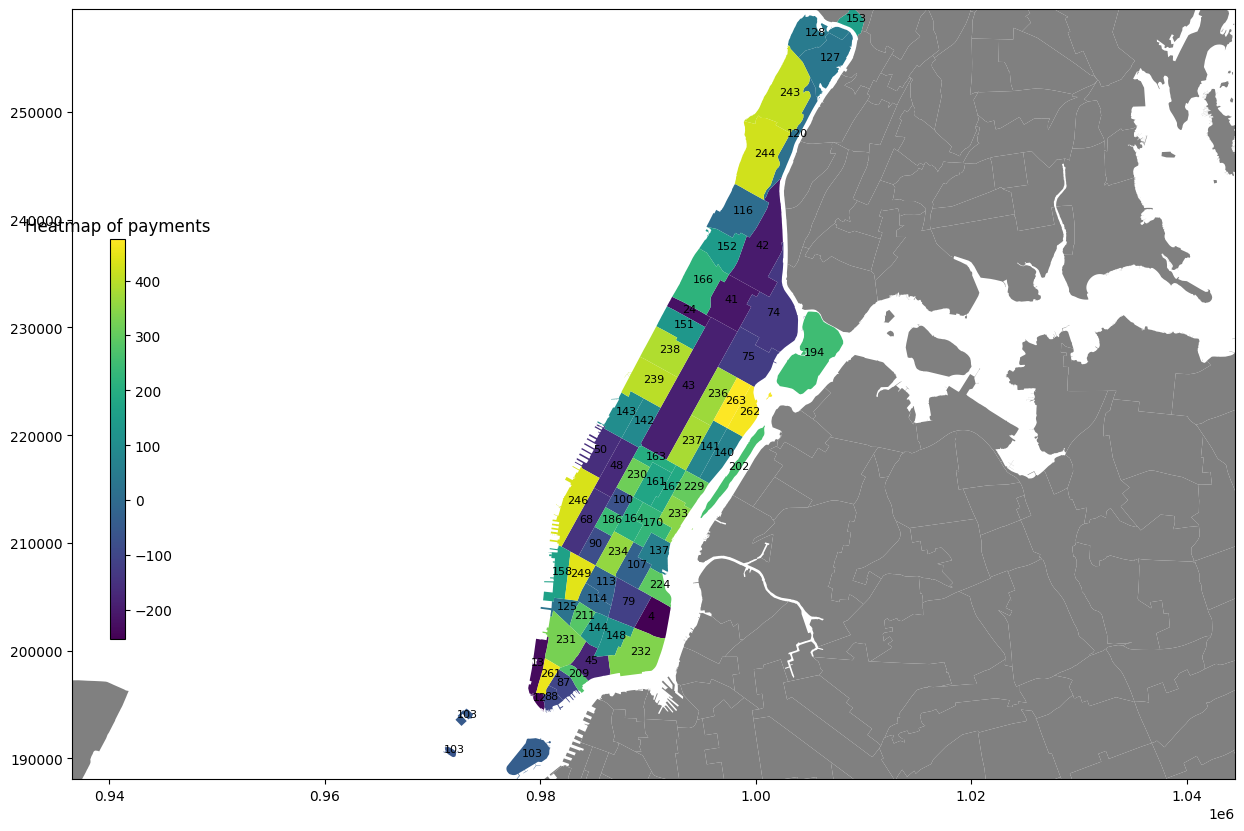

In [22]:
cmap = 'viridis'
fig, ax = plt.subplots(1, figsize=(15, 10))
ax = geo_map[selection].plot(ax=ax,cmap = cmap, figsize=(15,10))
ax = geo_map[~selection].plot(ax=ax,color = 'gray', figsize=(15,10))
ax.axis("equal")
ax.axis([lonmin, lonmax, latmin, latmax])

for x, y, label in zip(geo_map[selection].centroid.x, geo_map[selection].centroid.y, geo_map[selection].LocationID):
    ax.annotate(label, xy=(x, y), xytext=(-5, 0), textcoords="offset points", color = 'black', fontsize = 8)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=total_min, vmax=total_max), cmap = cmap)
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
plt.title('Heatmap of payments') 

## 2. Análisis exploratorio inicial

In [24]:
#Visualizar las primeras filas.
filtered_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.20,0.0,0.3,26.00,2.5,0.0


In [ ]:
#Realizar un resumen de 5 números.

In [28]:
#Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si
#es informativa para un problema de clasificación (por ejemplo si se trata de un código, como
#una matrícula, o un nombre propio).
filtered_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [30]:
filtered_df['VendorID'].value_counts()

2    1512143
1     653350
5         20
Name: VendorID, dtype: int64

In [31]:
filtered_df['passenger_count'].value_counts()

1.0    1583890
2.0     298332
3.0      74070
0.0      46287
5.0      45864
4.0      30808
6.0      28520
7.0          5
8.0          3
9.0          1
Name: passenger_count, dtype: int64

In [32]:
filtered_df['RatecodeID'].value_counts()

1.0     2082295
2.0       14451
5.0        6069
3.0        3297
99.0       1343
4.0         315
6.0          10
Name: RatecodeID, dtype: int64

In [33]:
filtered_df['store_and_fwd_flag'].value_counts()

N    2058402
Y      49378
Name: store_and_fwd_flag, dtype: int64

In [34]:
filtered_df['payment_type'].value_counts()

1    1675416
2     414593
0      57733
3       8942
4       8828
5          1
Name: payment_type, dtype: int64

| Nombre campo | Tipo de dato | Tipo | Significado
|-----------|-----------|-----------|-----------|
|VendorID              | int64      | Categórica | Empresa telefonía
|tpep_pickup_datetime  | datetime64 | | Inicio viaje
|tpep_dropoff_datetime | datetime64 | | Fin viaje
|passenger_count       | float64    | | Cantidad pasajeros
|trip_distance         | float64    |  | Distancia viaje
|RatecodeID            | float64    | Categórica | Codigo tarifa
|store_and_fwd_flag    | object     | Categórica | Se guardo en memoria 
|PULocationID          | int64      | | Id zona comienzo
|DOLocationID          | int64      | | Id zona fin
|payment_type          | int64      | Categórica | Forma de pago
|fare_amount           | float64    | | Monto del viaje
|extra                 | float64    | | Extras
|mta_tax               | float64    | | Impuesto MTA
|tip_amount            | float64    | | Propina
|tolls_amount          | float64    | | Monto peajes
|improvement_surcharge | float64    | | Recargo por mejoras
|total_amount          | float64    | | Monto total
|congestion_surcharge  | float64    | | Recargo por congestión
|airport_fee           | float64    | | Tarifa aeropuerto           |
